In [2]:
import networkx as nx
from bs4 import BeautifulSoup
import requests
import re
import json
import pandas as pd
import os
import numpy as np
IMPORT_FOLDER = "./data/"
EXPORT_FOLDER = "./res/"


In [3]:
with open(IMPORT_FOLDER+"data_items.json", "r", encoding="utf8") as f:
    mult_items = json.loads(f.read())
print("length mult_items base", len(mult_items.keys()))
dedoubl = pd.read_csv(IMPORT_FOLDER+"data_article_clean.csv")
remove_list = list(set(mult_items.keys()) - set(list(dedoubl.URL)))
for item in remove_list:    
    del mult_items[item]
print("length mult-items dédoublonné", len(mult_items.keys()))
print("lenght df dédoublonné", len(dedoubl))

length mult_items base 3603


length mult-items dédoublonné 2119
lenght df dédoublonné 2119


# TAGS

In [109]:

tag_dic = {}

for url in mult_items:
    # print(url, len(mult_items[url]["tags"]))
    for tag in mult_items[url]["tags"]:
        if tag == "N" or tag == "A" or tag == '\n   \tThéo BATTAGLIA\n':
            pass
        elif tag not in tag_dic.keys():
            tag_dic[tag] = {}

for tag in tag_dic.keys():
    # tag_dic[tag]["value"] = 0
    for url in mult_items:
        if tag in mult_items[url]["tags"]:
            # tag_dic[tag]["value"] += 1
            for t in mult_items[url]["tags"]:
                if t in tag_dic.keys():
                    if t != tag and t not in tag_dic[tag].keys():
                        tag_dic[tag][t] = {"weight" : 1}
                    elif t != tag and t in tag_dic[tag].keys():
                        tag_dic[tag][t]["weight"] += 1


G = nx.Graph()

for url in mult_items:
    for tag in mult_items[url]["tags"]:
        if tag not in G.nodes():
            G.add_node(tag, value = 1)
        elif tag in G.nodes():
            G.nodes[tag]["value"] += 1

for node in G.nodes:
    for url in mult_items:
        if node in mult_items[url]["tags"]:
            for tag in mult_items[url]["tags"]:
                if node != tag and not G.has_edge(tag, node):
                    G.add_edge(node, tag, weight = 1)
                elif node != tag and G.has_edge(tag, node):
                    G[node][tag]["weight"] += 1

# g = nx.Graph(tag_dic)
# nx.draw_shell(G)
# export = nx.cytoscape_data(G)
# # with open(EXPORT_FOLDER+"tag_net.json", "w", encoding="utf8") as f:
# #     f.write(json.dumps(export))

# value = []
# for tag in tag_dic.keys():
#     value.append(tag_dic[tag]["value"])
# val = pd.DataFrame(value)
# val.index = tag_dic.keys()
# val.to_csv(EXPORT_FOLDER+"nodes_attributes.csv")
# print(json.dumps(export, indent = 4))


C:\Users\Alioscha\AppData\Local\Temp\ipykernel_4548\19063370.py:57: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



,source,target,values
0,Mobilité,Climat,6.0
1,Mobilité,Transition,22.0
2,Mobilité,Innovation,37.0
4,Mobilité,Grand Lyon,16.0
5,Mobilité,Économie,3.0
...,...,...,...
3000,Égalité,Cohésion sociale,1.0
3004,Égalité,Genre,5.0
3012,Égalité,Démocratie,1.0
3017,Égalité,Laïcité,2.0


# AUTEURS

In [9]:

aut_dic = {}

for url in mult_items:
    # print(url, len(mult_items[url]["tags"]))
    for aut in mult_items[url]["auteurs"]:
        if aut == "N" or aut == "A":
            pass
        else:
            if aut not in aut_dic.keys():
                aut_dic[aut] = {}
            #     aut_dic[aut]["value"] = 1
            # elif aut in aut_dic.keys():
            #     aut_dic[aut]["value"] += 1


for aut in aut_dic.keys():
    for url in mult_items:
        if aut in mult_items[url]["auteurs"]:
            # aut_dic[aut]["value"] += 1
            for a in mult_items[url]["tags"]:
                if a != aut and a not in aut_dic[aut].keys():
                    aut_dic[aut][a] = {"weight" : 1}
                elif a != aut and a in aut_dic[aut].keys():
                    aut_dic[aut][a]["weight"] += 1


G = nx.Graph()

for url in mult_items:
    for aut in mult_items[url]["auteurs"]:
        if aut not in G.nodes():
            G.add_node(aut, value = 1)
        elif aut in G.nodes():
            G.nodes[aut]["value"] += 1

for node in G.nodes:
    for url in mult_items:
        if node in mult_items[url]["auteurs"]:
            for aut in mult_items[url]["auteurs"]:
                if node != aut and not G.has_edge(aut, node):
                    G.add_edge(node, aut, weight = 1)
                elif node != aut and G.has_edge(aut, node):
                    G[node][aut]["weight"] += 1

# g = nx.Graph(aut_dic)
# print(list(nx.connected_components(g)))
# print(nx.number_connected_components(g))
# nx.draw(g)

#nx.draw(G)
# for i, item in enumerate(nx.connected_components(G)):
#     if len(item) > 2:
#         print(i, len(item), item)
# export = nx.cytoscape_data(G)
# with open(EXPORT_FOLDER+"aut_net.json", "w", encoding="utf8") as f:
#     f.write(json.dumps(export))

# value = []
# for aut in aut_dic.keys():
#     print(f"\r{aut_dic[aut]['value']}")
#     value.append(aut_dic[aut]["value"])
# val = pd.DataFrame(value)
# val.index = aut_dic.keys()
# val.to_csv(EXPORT_FOLDER+"autnodes_attributes.csv")

# g = nx.Graph(aut_dic)
# d = nx.to_pandas_adjacency(g)
# d.values[[np.arange(len(d))]*2] = np.nan
# d = d.stack().reset_index()
# d.columns = ["source", "target", "values"]
# d = d[d["values"] > 0]
# d.to_csv("./pages/data/aut2tag.csv")

/var/folders/96/70zwd2vj3hvcyjlcgv7y0vth0000gn/T/ipykernel_2031/627296319.py:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d.values[[np.arange(len(d))]*2] = np.nan


# TAG et AUTEURS

In [10]:
G = nx.Graph()

for item in mult_items.values():
    for aut in item["auteurs"]:
        if aut == 'A' or aut == "N":
            continue
        if aut not in G.nodes:
            G.add_node(aut, value = 1, type = "Auteurs")
        elif aut in G.nodes:
            G.nodes[aut]["value"] += 1
    for tag in item["tags"]:
        if tag == 'A' or tag == "N":
            continue
        if tag not in G.nodes:
            G.add_node(tag, value = 1, type = "Tags")
        elif tag in G.nodes:
            G.nodes[tag]["value"] += 1

for i, node in enumerate(G.nodes):
    print(f"\r{i, node}", end="")
    for item in mult_items.values():
        tags = item["tags"]
        auts = item["auteurs"]
        if node in tags:
            for aut in auts:
                if aut == 'A' or aut == "N":
                    continue
                if node != aut and not G.has_edge(aut, node):
                    G.add_edge(node, aut, weight = 1)
                elif node != aut and G.has_edge(aut, node):
                    G.edges[(node, aut)]["weight"] += 1
        #     for tag in tags:
        #         if tag == 'A' or tag == "N":
        #             continue
        #         if node != tag and not G.has_edge(tag, node):
        #             G.add_edge(node, tag, weight = 1)
        #         elif node != tag and G.has_edge(tag, node):
        #             G.edges[(node, tag)]["weight"] += 1
        #     continue
        # if node in auts:
        #     for aut in auts:
        #         if aut == 'A' or aut == "N":
        #             continue
        #         if node != aut and not G.has_edge(aut, node):
        #             G.add_edge(node, aut, weight = 1)
        #         elif node != aut and G.has_edge(aut, node):
        #             G.edges[(node, aut)]["weight"] += 1
        #     for tag in tags:
        #         if tag == 'A' or tag == "N":
        #             continue
        #         if node != tag and not G.has_edge(tag, node):
        #             G.add_edge(node, tag, weight = 1)
        #         elif node != tag and G.has_edge(tag, node):
        #             G.edges[(node, tag)]["weight"] += 1

# nx.draw(G)
# export = nx.cytoscape_data(G)
# with open(EXPORT_FOLDER+"all_net.json", "w", encoding="utf8") as f:
#     f.write(json.dumps(export))

# value = []
# type = []
# for node in G.nodes:
#     value.append(G.nodes[node]["value"])
#     type.append(G.nodes[node]["type"])
# items = zip(value, type)
# val = pd.DataFrame(items, columns=["value", "type"])
# val.index = G.nodes
# val.to_csv(EXPORT_FOLDER+"allnodes_attributes.csv")

# g = nx.Graph(tag_dic)
# d = nx.to_pandas_adjacency(G)
# d.values[[np.arange(len(d))]*2] = np.nan
# d = d.stack().reset_index()
# d.columns = ["source", "target", "values"]
# d = d[d["values"] > 0]
# d
# d.to_csv("./pages/data/tag2aut.csv")

(603, 'Noé DELARGILLIÈRE')))T')LEX')"')TEURS DE LEDUCATION DES VILLES DE FRANCE"')

/var/folders/96/70zwd2vj3hvcyjlcgv7y0vth0000gn/T/ipykernel_2031/4109596715.py:73: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d.values[[np.arange(len(d))]*2] = np.nan


<AxesSubplot:>

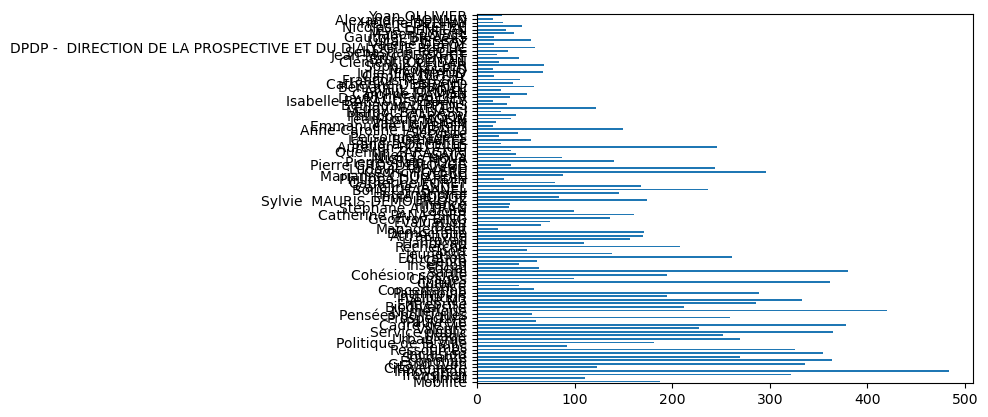

In [56]:
val[val.value > 15].value.plot(kind="barh")

In [11]:
url_aut = {}
i = 0
for url in mult_items:
    for aut in mult_items[url]["auteurs"]:
        if aut == "N" or aut == "A":
            pass
        else:
            tags = mult_items[url]["tags"]
            url_aut[i] = {"auteurs" : aut, "url" : url, "tags" : "_".join(tags)}
        i += 1
df = pd.DataFrame().from_dict(url_aut).transpose()
df = df.join(df.tags.str.split(pat='_',expand=True))
# df.to_csv(EXPORT_FOLDER+"auteurs.csv")

In [12]:
url_tag = {}
i = 0
for url in mult_items:
    for tag in mult_items[url]["tags"]:
        if tag == "N" or tag == "A":
            pass
        else:
            auteurs = mult_items[url]["auteurs"]
            url_tag[i] = {"tags" : tag, "url" : url, "auteurs" : "_".join(auteurs)}
        i += 1
df = pd.DataFrame().from_dict(url_tag).transpose()
df = df.join(df.auteurs.str.split(pat='_',expand=True))
# df.to_csv(EXPORT_FOLDER+"tags.csv")

### For Plotly

In [13]:
import numpy as np

aut_dic = {}

for url in mult_items:
    for aut in mult_items[url]["auteurs"]:
        if aut == "N" or aut == "A":
            pass
        else:
            if aut not in aut_dic.keys():
                aut_dic[aut] = {}
                
for aut in aut_dic.keys():
    for url in mult_items:
        if aut in mult_items[url]["auteurs"]:
            # aut_dic[aut]["value"] += 1
            for a in mult_items[url]["auteurs"]:
                if a != aut and a not in aut_dic[aut].keys():
                    aut_dic[aut][a] = {"weight" : 1}
                elif a != aut and a in aut_dic[aut].keys():
                    aut_dic[aut][a]["weight"] += 1

g = nx.Graph(aut_dic)
d = nx.to_pandas_adjacency(g)
d.values[[np.arange(len(d))]*2] = np.nan
d = d.stack().reset_index()
d.columns = ["source", "target", "values"]
d = d[d["values"] > 0]
# d.to_csv("./pages/data/auteurs_link.csv")

/var/folders/96/70zwd2vj3hvcyjlcgv7y0vth0000gn/T/ipykernel_2031/1554779690.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d.values[[np.arange(len(d))]*2] = np.nan


In [14]:
import re

tag_dic = {}


for url in mult_items:
    # print(url, len(mult_items[url]["tags"]))
    for tag in mult_items[url]["tags"]:
        if tag == "N" or tag == "A" or tag == '\n   \tThéo BATTAGLIA\n':
            pass
        else:
            if tag not in tag_dic.keys():
                tag_dic[tag] = {}

for tag in tag_dic.keys():
    for url in mult_items:
        if tag in mult_items[url]["tags"]:
            for t in mult_items[url]["tags"]:
                if t in tag_dic.keys():
                    if t != tag and t not in tag_dic[tag].keys():
                        tag_dic[tag][t] = {"weight" : 1}
                    elif t != tag and t in tag_dic[tag].keys():
                        tag_dic[tag][t]["weight"] += 1

g = nx.Graph(tag_dic)
d = nx.to_pandas_adjacency(g)
d.values[[np.arange(len(d))]*2] = np.nan
d = d.stack().reset_index()
d.columns = ["source", "target", "values"]
d = d[d["values"] > 0]
# d.to_csv("./pages/data/tags_link.csv")

/var/folders/96/70zwd2vj3hvcyjlcgv7y0vth0000gn/T/ipykernel_2031/1135979563.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d.values[[np.arange(len(d))]*2] = np.nan
